# Insurance Charge Prediction

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# EDA

In [4]:
# reading data
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
# shape of data
df.shape

(1338, 7)

In [6]:
# so there are 7 column. and we have to predict last wala charges.
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# describing the data(only numeric)
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# is there any null values:
df.isnull().sum()
# we don't have any null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

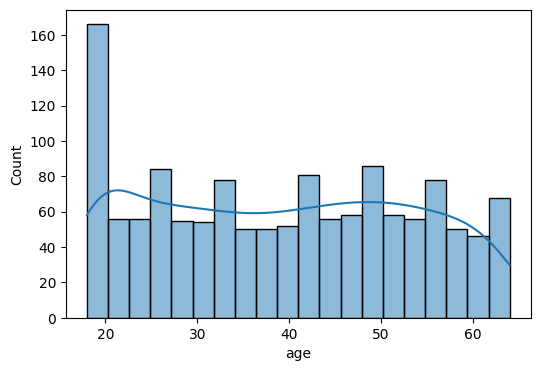

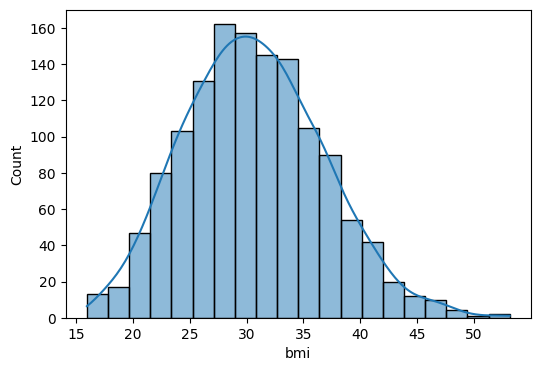

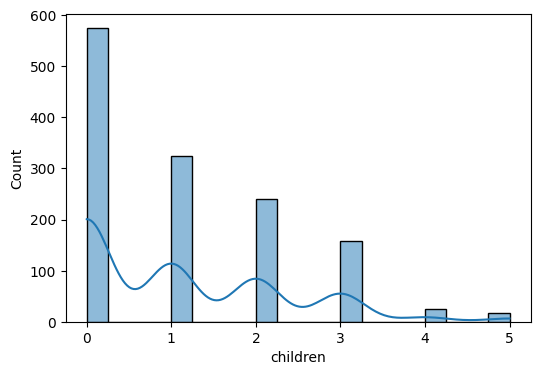

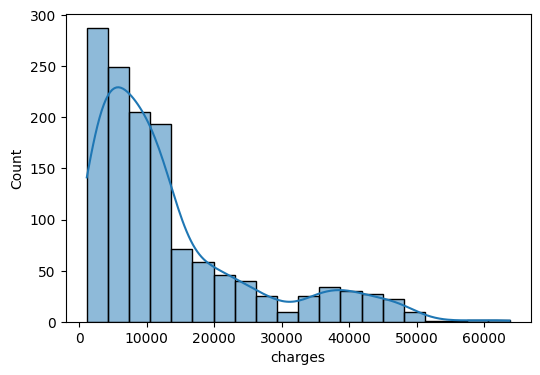

In [10]:
# distribution plot for numeric-> 'age', 'bmi', 'children', 'charges'
numeric_columns = ['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde = True, bins = 20)

<Axes: xlabel='children', ylabel='count'>

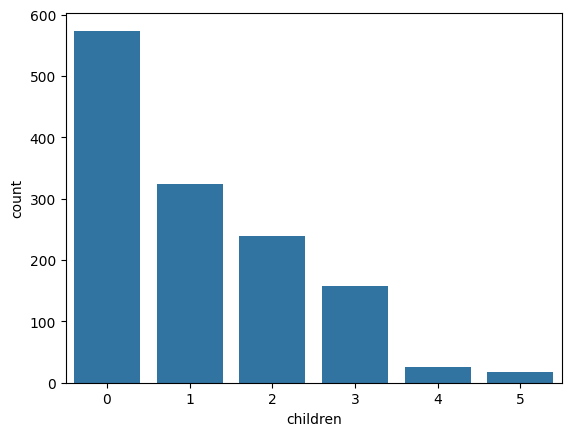

In [11]:
 
# count plot for children
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

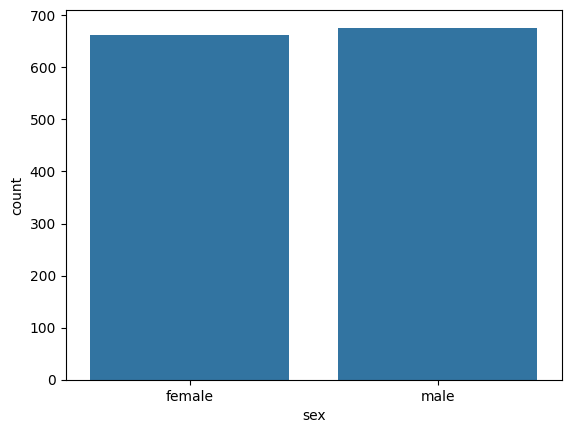

In [12]:
# for genders
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

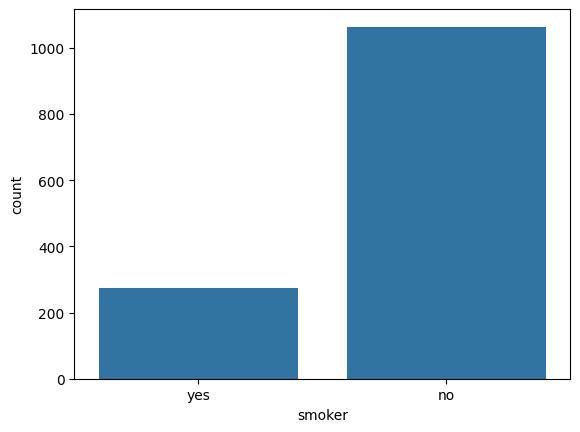

In [13]:
# for smokers
sns.countplot(x = df['smoker'])

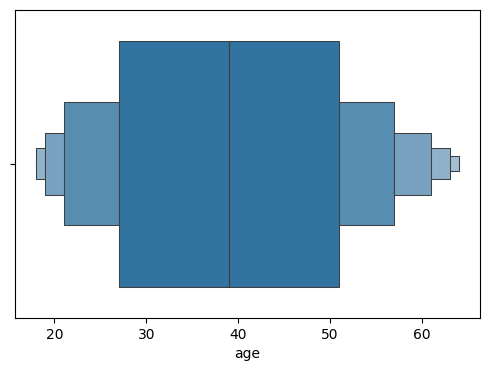

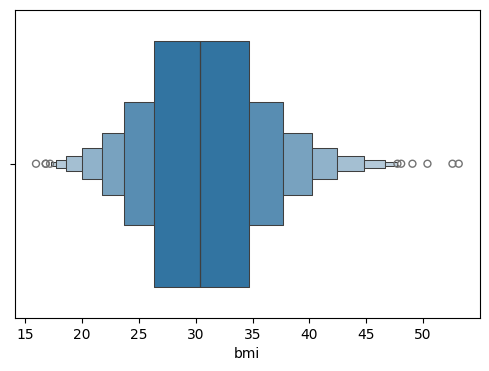

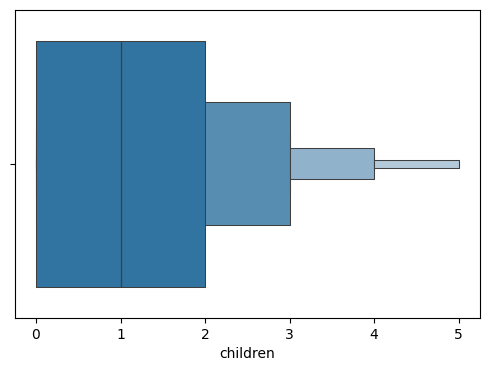

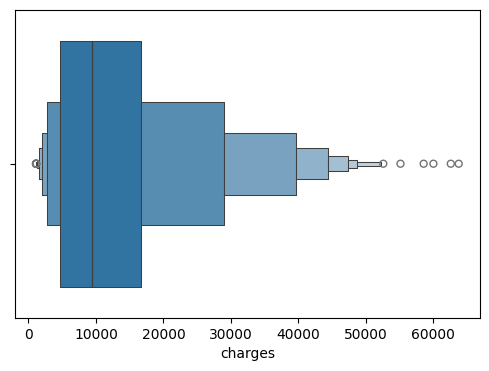

In [14]:

for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxenplot(x = df[col])

<Axes: >

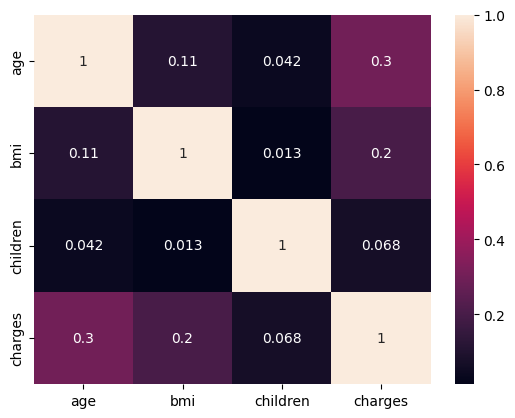

In [15]:
# now see some relation between data
# corelation -> only for numeric data
plt.Figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data cleaning and Preprocessing

In [16]:
# in this pdf, all the data is cleaned, so no need to clean data for this insurance file.
df_cleaned = df.copy()
df_cleaned.head()
# we copied our data into df_cleaned for the operation like
# first give it null or missing value than handle it

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df_cleaned.shape

(1338, 7)

In [18]:
df_cleaned.drop_duplicates(inplace=True)

In [19]:
df_cleaned.shape

(1337, 7)

In [20]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [21]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [22]:
# so we are making all the object(non-numeric) into numeric

In [23]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [24]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [25]:
# so here are sex, smoker and region are object we are converting into 0's and 1's (numeric)


# label encoding

In [26]:
df_cleaned['sex'] = df_cleaned['sex'].map({"male" : 0, "female" : 1})

In [27]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [28]:
# doing same for smoker
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [29]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({"no" : 0, "yes" : 1})

In [30]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [31]:
# renaming sex-> isFemale, smoker-> isSmoker
df_cleaned.rename(columns={
    'sex': 'is_female',
    'smoker': 'is_smoker'
}, inplace=True)

In [32]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [33]:
# now encoding region
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# one hot encoding on region

In [34]:
# one hot coding on
df_cleaned = pd.get_dummies(df_cleaned,columns = ['region'], drop_first=True)

In [35]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,True
1,18,0,33.770,1,0,1725.55230,False,True,False
2,28,0,33.000,3,0,4449.46200,False,True,False
3,33,0,22.705,0,0,21984.47061,True,False,False
4,32,0,28.880,0,0,3866.85520,True,False,False


In [36]:
df_cleaned = df_cleaned.astype(int)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,1
1,18,0,33,1,0,1725,0,1,0
2,28,0,33,3,0,4449,0,1,0
3,33,0,22,0,0,21984,1,0,0
4,32,0,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0
1334,18,1,31,0,0,2205,0,0,0
1335,18,1,36,0,0,1629,0,1,0
1336,21,1,25,0,0,2007,0,0,1


# Feature Engineering and Extraction

<Axes: xlabel='bmi', ylabel='Count'>

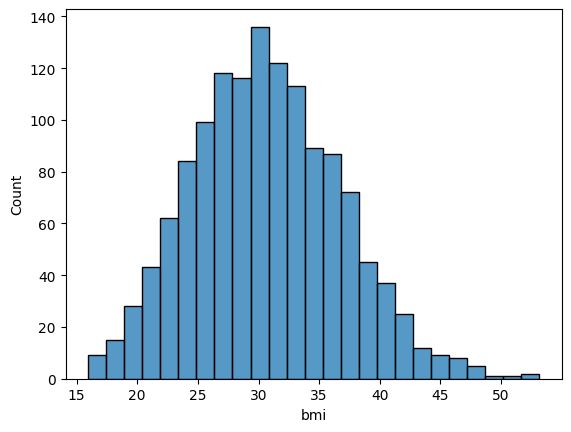

In [37]:
sns.histplot(df['bmi'])

In [38]:
# categories bmi into diffrent diffrent classes...
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.5, 29.9, float('inf')],
    labels=['UnderWeight', 'Normal', 'OverWeight', 'Obse']
)

In [39]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,1,OverWeight
1,18,0,33,1,0,1725,0,1,0,Obse
2,28,0,33,3,0,4449,0,1,0,Obse
3,33,0,22,0,0,21984,1,0,0,Normal
4,32,0,28,0,0,3866,1,0,0,OverWeight
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,Obse
1334,18,1,31,0,0,2205,0,0,0,Obse
1335,18,1,36,0,0,1629,0,1,0,Obse
1336,21,1,25,0,0,2007,0,0,1,OverWeight


In [40]:
# so, now into bmi categories there are string, 
# so we have to change it into numeric
# so we are using one hot encoding.
df_cleaned = pd.get_dummies(df_cleaned, columns = ['bmi_category'], drop_first=True)

In [41]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obse
0,19,1,27,0,1,16884,0,0,1,False,True,False
1,18,0,33,1,0,1725,0,1,0,False,False,True
2,28,0,33,3,0,4449,0,1,0,False,False,True
3,33,0,22,0,0,21984,1,0,0,True,False,False
4,32,0,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,False,False,True
1334,18,1,31,0,0,2205,0,0,0,False,False,True
1335,18,1,36,0,0,1629,0,1,0,False,False,True
1336,21,1,25,0,0,2007,0,0,1,False,True,False


In [42]:
df_cleaned = df_cleaned.astype(int)

In [43]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obse
0,19,1,27,0,1,16884,0,0,1,0,1,0
1,18,0,33,1,0,1725,0,1,0,0,0,1
2,28,0,33,3,0,4449,0,1,0,0,0,1
3,33,0,22,0,0,21984,1,0,0,1,0,0
4,32,0,28,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,1,0,0,0,0,1
1334,18,1,31,0,0,2205,0,0,0,0,0,1
1335,18,1,36,0,0,1629,0,1,0,0,0,1
1336,21,1,25,0,0,2007,0,0,1,0,1,0


Feature scaling

In [44]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_OverWeight', 'bmi_category_Obse'],
      dtype='object')

In [45]:
# standerd scalling of age and bmi and children -> standerd deviation (-3 to +3)
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [46]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_OverWeight,bmi_category_Obse
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,1,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,1,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,1,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,1,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,1,0,0,0,1,0


#  Feature Extraction

In [47]:
from scipy.stats import pearsonr
# Pearson Correlation Claculation

# list of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_OverWeight', 'bmi_category_Obse'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}

correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlations_df.sort_values(by='Pearson Correlation', ascending=False)


,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obse,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [48]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_OverWeight', 'bmi_category_Obse'
]

In [49]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)  # corrected column name
chi2_result = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_result[col] = {
        'chi2_statistics': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_result).T 
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistics,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obse,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_OverWeight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [50]:
# final data frame:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges', 'region_southeast', 'bmi_category_Obse']]


In [52]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obse
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,1.580143,0,10600,0,1
1334,-1.511647,1,0.135659,-0.909234,0,2205,0,1
1335,-1.511647,1,0.952670,-0.909234,0,1629,1,1
1336,-1.297958,1,-0.844753,-0.909234,0,2007,0,0


# Machine Learning Start-> Linear Regression

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = final_df.drop('charges', axis=1)
y = final_df['charges']

In [55]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [56]:
from sklearn.linear_model import LinearRegression

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# y test(prediction)

In [59]:
y_pred = model.predict(X_test)

In [60]:
y_pred

array([ 7856.41808069,  5379.07145062, 14613.47489419, 32465.93193508,
        8955.35729283, 13336.43605749, 30199.07309038,  1403.40503994,
       11196.90873514, 10018.65838301, 10818.71629044, 32144.43533014,
       31550.26059902, 16230.55597963, 10285.99989714,  8488.6608457 ,
        5487.64476113, 32465.09672212,  3304.46601962,  3877.00422671,
        4760.01023433, 28796.29743032, 13870.98195763, 29541.88243902,
       31520.15678042,  6344.44675222, 35026.69683204, 37880.73853364,
       12490.06211178, 14238.95332785,  7573.09915473, 13049.08020135,
         516.21534048, 11339.74207305, 37584.28749479, 13356.84393437,
        3706.96614326,  4537.12786929, 31481.80485676,  8009.55465514,
        6075.79442888, 30404.81913857, 35276.56346051, 13099.59189682,
        7977.69705664,  2987.00634487,  5174.11237148,  7620.54073087,
        3522.89053725, 10388.99625751,  7820.00530896, 10505.68054495,
       30331.09138384,  4687.62077185, 11676.0149257 , 11446.77536361,
      

In [61]:
y_test

900      8688
1064     5708
1256    11436
298     38746
237      4463
        ...  
534     13831
542     13887
760      3925
1284    47403
1285     8534
Name: charges, Length: 268, dtype: int64

In [62]:
# now comparing models
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [ ]:
# accuracy->
r2

0.8040712413347118

In [64]:
# adjusted R2

In [65]:
n = X_test.shape[0] # no of row
p = X_test.shape[1] # no of col

adjusted_r2 = 1 - ((1- r2) * (n - 1) / (n - p - 1))
adjusted_r2

0.7987962362937232